In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('NV_23062017_WBAN_53138_clean.csv')
                                                                
# Initial Data Processing
df['DATE'] = df['DATE'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M'))
df['DAILYSunrise'] = df['DAILYSunrise'].map(lambda x: datetime.strptime(str(x), '%H%M'))
df['DAILYSunset'] = df['DAILYSunset'].map(lambda x: datetime.strptime(str(x), '%H%M'))
df['PUREDATE'] = df['DATE'].map(lambda x : x.date())
df['MONTH'] = df['DATE'].map(lambda x : x.month)
df['YEAR'] = df['DATE'].map(lambda x : x.year)
df['HOUR'] = df['DATE'].map(lambda x : x.hour)
df['dailyTempDiff'] = df['DAILYMaximumDryBulbTemp'] - df['DAILYMinimumDryBulbTemp']

# Calculate Season
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasonDates = [('Winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('Spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('Summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('Autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('Winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasonDates
                if start <= now <= end)

df['SEASON'] = df['DATE'].map(lambda x : get_season(x))

# Temperature By Year

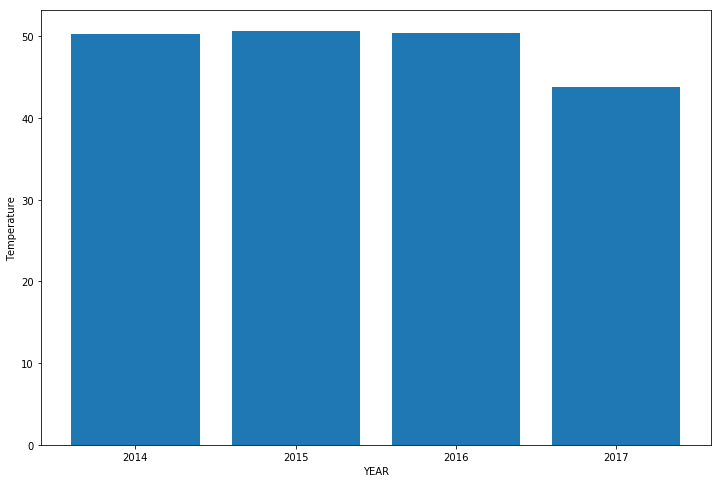

In [3]:
groupByUnit = 'YEAR'

TempByDateDf = pd.DataFrame(df.groupby(groupByUnit)['HOURLYDRYBULBTEMPF'].mean()).reset_index()

ind = np.arange(len(TempByDateDf[groupByUnit]))

plt.bar(ind, TempByDateDf['HOURLYDRYBULBTEMPF'])
plt.xticks(ind, TempByDateDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Temperature')

#### The figure indicates that the temperature in the last 3 years are stable. We do not analyze the data in year 2017 because it is incomplete.

# Temperature By Season

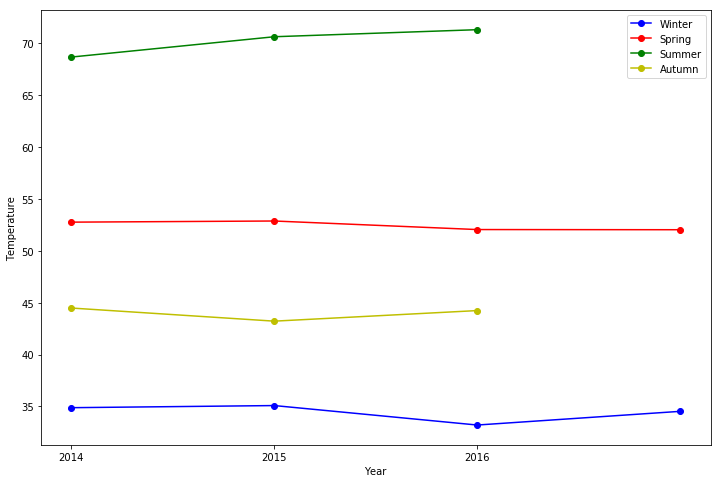

In [4]:
TempBySeasonDf = pd.DataFrame(df.groupby(['YEAR', 'SEASON'])['HOURLYDRYBULBTEMPF'].mean()).reset_index()

colors = ['b', 'r', 'g', 'y']

for i in range(len(seasons)):
    x = TempBySeasonDf[TempBySeasonDf['SEASON'] == seasons[i]]['YEAR']
    y = TempBySeasonDf[TempBySeasonDf['SEASON'] == seasons[i]]['HOURLYDRYBULBTEMPF']
    plt.plot(x, y, marker='o', color=colors[i], linestyle='-', label=seasons[i])

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(x)
plt.legend()

#### The figure above indicates that the temperature in four seasons is: Summer > Spring > Autumn > Winter. And the temperature in all the four seasons in the last 3 years are stable.  We do not analyze the data in year 2017 because it is incomplete.

# Temperature Difference By Year

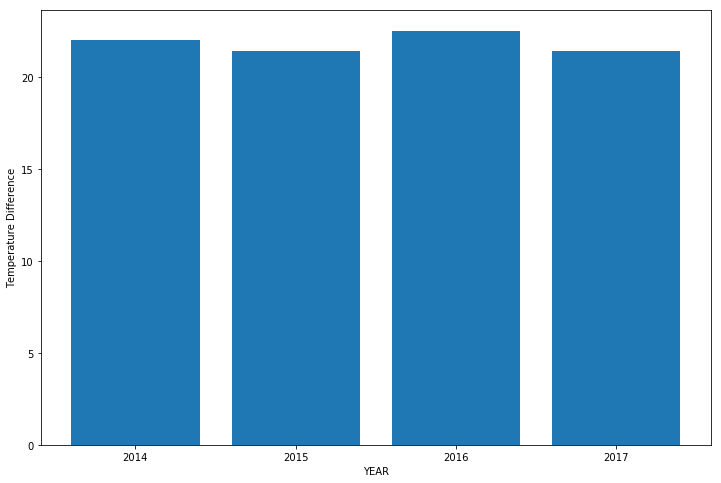

In [6]:
groupByUnit = 'YEAR'

TempDiffByYearDf = pd.DataFrame(df.groupby(groupByUnit)['dailyTempDiff'].mean()).reset_index()

ind = np.arange(len(TempDiffByYearDf[groupByUnit]))

plt.bar(ind, TempDiffByYearDf['dailyTempDiff'])
plt.xticks(ind, TempDiffByYearDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Temperature Difference')

#### The figure indicates that the average temperature difference in the last 3 years are stable. We do not analyze the data in year 2017 because it is incomplete.

# Temperature Difference By Season

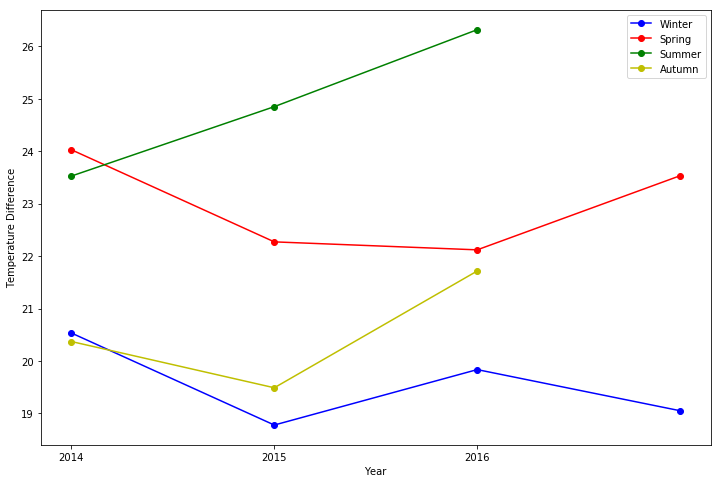

In [7]:
TempDiffBySeasonDf = pd.DataFrame(df.groupby(['YEAR', 'SEASON'])['dailyTempDiff'].mean()).reset_index()

colors = ['b', 'r', 'g', 'y']

for i in range(len(seasons)):
    x = TempDiffBySeasonDf[TempDiffBySeasonDf['SEASON'] == seasons[i]]['YEAR']
    y = TempDiffBySeasonDf[TempDiffBySeasonDf['SEASON'] == seasons[i]]['dailyTempDiff']
    plt.plot(x, y, marker='o', color=colors[i], linestyle='-', label=seasons[i])

plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.xticks(x)
plt.legend()

#### The figure above indicates that the temperature difference in four seasons in general is : Summer > Spring > Autumn > Winter. While the temperature difference data in year 2014 has different patterns from year 2015 and 2016.  We do not analyze the data in year 2017 because it is incomplete.

# Temperature Departure By Month

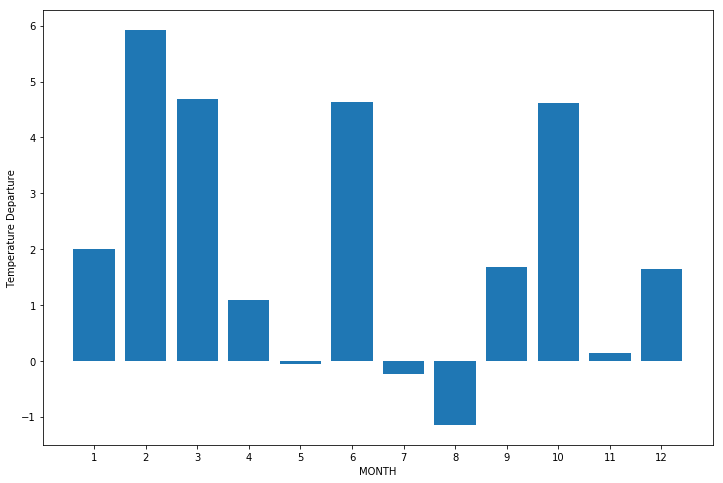

In [8]:
groupByUnit = 'MONTH'

tempDeptDf = pd.DataFrame(df.groupby(groupByUnit)['DAILYDeptFromNormalAverageTemp'].mean()).reset_index()

ind = np.arange(len(tempDeptDf[groupByUnit]))

plt.bar(ind, tempDeptDf['DAILYDeptFromNormalAverageTemp'])
plt.xticks(ind, tempDeptDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Temperature Departure')

#### The figure above indicates that the temperature departure since 2014 shows the following patterns: The temperature in Feb, Mar, Jun, and Oct are greatly higher than the history data, while the temperature in May, Jul, and Nov are basically identical to history data, and the temperature in Aug is greatly lower than the history data.

# Daily Sunset Line Chart


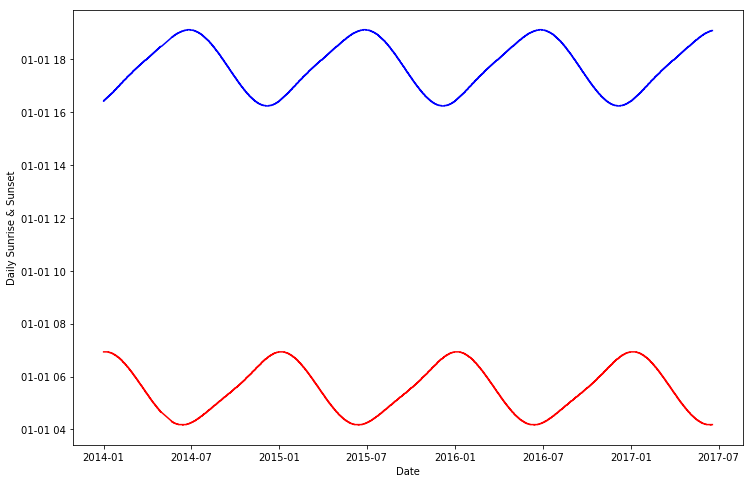

In [9]:
x = df['PUREDATE']
y = df['DAILYSunset']

plt.plot(x, y, color='b', linestyle='-', label='SunSet')

y = df['DAILYSunrise']
plt.plot(x, y, color='r', linestyle='-', label='Sunrise')

plt.xlabel('Date')
plt.ylabel('Daily Sunrise & Sunset')

#### The figure above indicates that the trend of sunrise and sunset time above the 3 and a half years time span is fluent and shows strong pattern. We can see that the peaks appear at the summer solstice and autumn solstice.

# Wind Speed By Hour Box Plot


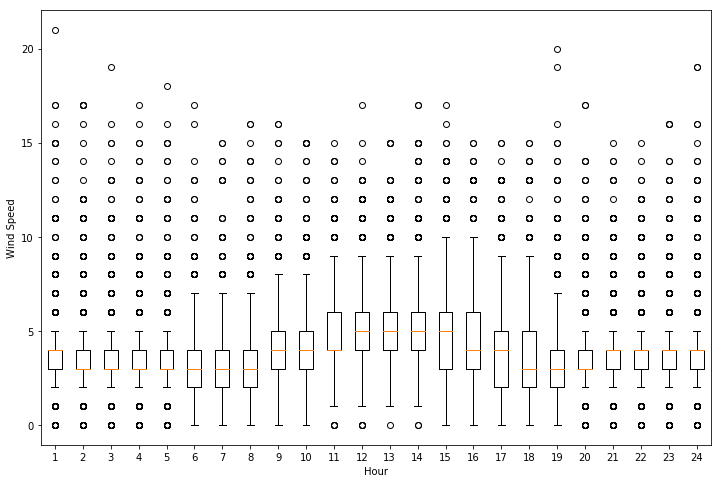

In [10]:
windSpeedDf = df[df['HOURLYWindSpeed'] == df['HOURLYWindSpeed']][['HOURLYWindSpeed', 'DATE', 'YEAR', 'SEASON', 'HOUR', 'PUREDATE']]

windSpeed_dict = {}
for index, row in windSpeedDf.iterrows():
    if row['HOUR'] in windSpeed_dict:
        windSpeed_dict[row['HOUR']].append(row['HOURLYWindSpeed'])
    else:
        windSpeed_dict[row['HOUR']] = []

plt.boxplot(list(windSpeed_dict.values()))
plt.xlabel('Hour')
plt.ylabel('Wind Speed')

#### The figure above indicates that the wind speed is higher in noon time than in the morning and evening. And the wind speed is more sparsely distributed in noon time.

# Wind Speed By Season

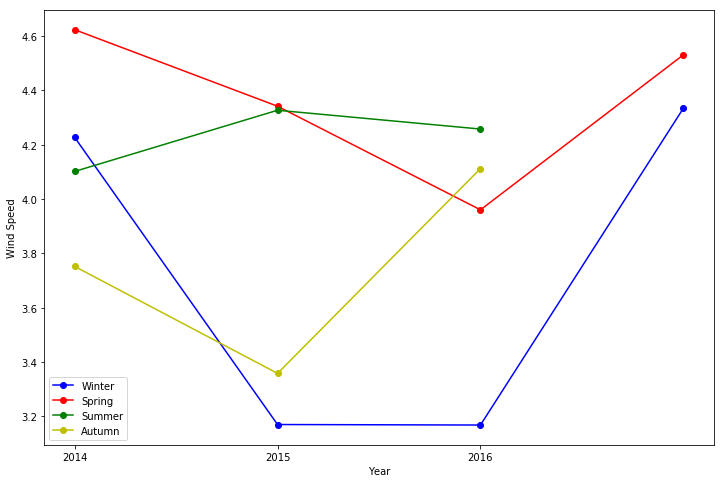

In [11]:
windSpeedBySeasonDf = pd.DataFrame(df.groupby(['YEAR', 'SEASON'])['HOURLYWindSpeed'].mean()).reset_index()

colors = ['b', 'r', 'g', 'y']

for i in range(len(seasons)):
    x = windSpeedBySeasonDf[windSpeedBySeasonDf['SEASON'] == seasons[i]]['YEAR']
    y = windSpeedBySeasonDf[windSpeedBySeasonDf['SEASON'] == seasons[i]]['HOURLYWindSpeed']
    plt.plot(x, y, marker='o', color=colors[i], linestyle='-', label=seasons[i])

plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.xticks(x)
plt.legend()

#### The figure above indicates that wind speed in four seasons do not follow a certain pattern among the 3 and a half years of time.

# Precipitation By Year

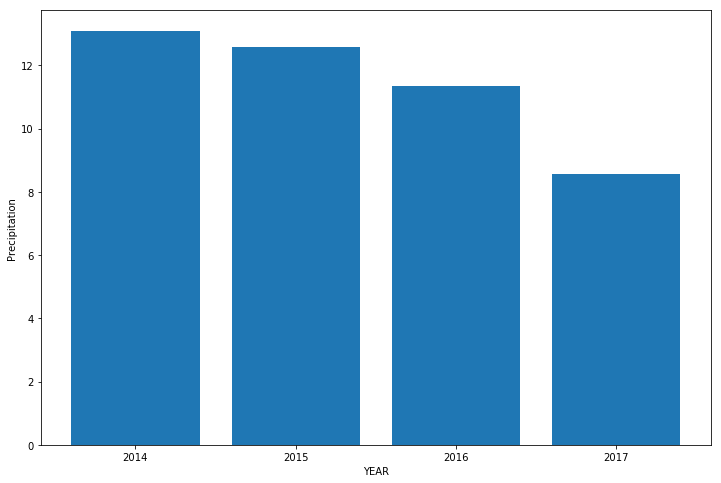

In [12]:
groupByUnit = 'YEAR'

TempDiffByYearDf = pd.DataFrame(df.groupby(groupByUnit)['HOURLYPrecip'].sum()).reset_index()

ind = np.arange(len(TempDiffByYearDf[groupByUnit]))

plt.bar(ind, TempDiffByYearDf['HOURLYPrecip'])
plt.xticks(ind, TempDiffByYearDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Precipitation')

#### The figure above indicates that the precipitation decreased a little bit as a yearly basis.

# Precipitation By Month


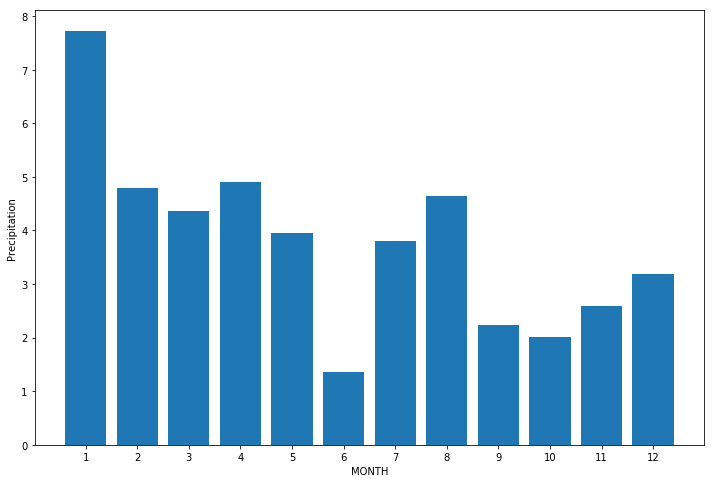

In [13]:
precipDf = df[df['HOURLYPrecip'] == df['HOURLYPrecip']]

groupByUnit = 'MONTH'

newPrecipDf = pd.DataFrame(precipDf.groupby(groupByUnit)['HOURLYPrecip'].sum()).reset_index()

ind = np.arange(len(newPrecipDf[groupByUnit]))

plt.bar(ind, newPrecipDf['HOURLYPrecip'])
plt.xticks(ind, newPrecipDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Precipitation')

#### The figure above indicates that the precipitation is generally higher in winter and lower in summer.

# Precipitation By Season

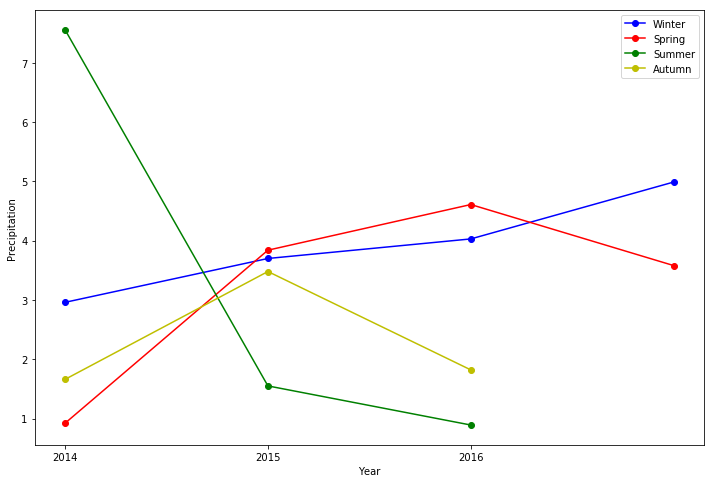

In [14]:
precipBySeasonDf = pd.DataFrame(df.groupby(['YEAR', 'SEASON'])['HOURLYPrecip'].sum()).reset_index()

colors = ['b', 'r', 'g', 'y']

for i in range(len(seasons)):
    x = precipBySeasonDf[precipBySeasonDf['SEASON'] == seasons[i]]['YEAR']
    y = precipBySeasonDf[precipBySeasonDf['SEASON'] == seasons[i]]['HOURLYPrecip']
    plt.plot(x, y, marker='o', color=colors[i], linestyle='-', label=seasons[i])

plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.xticks(x)
plt.legend()

#### The figure above indicates that the precipitation in 2014 is high in summer and low in other 3 seasons. While the precipitation in summer decreases dramatically in 2015 and 2016.

# Temperature and Wind Speed

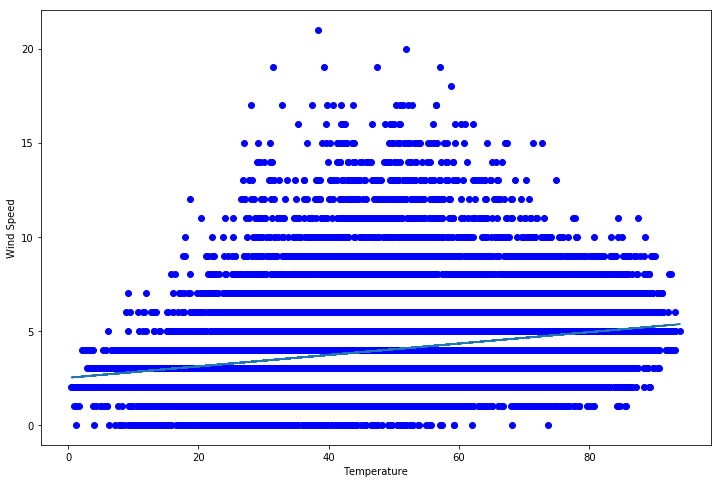

In [15]:
x = df.groupby(['PUREDATE', 'HOUR'])['HOURLYDRYBULBTEMPF'].mean().dropna()
y = windSpeedDf['HOURLYWindSpeed'].dropna()[:29836]

plt.scatter(x, y, color='b')
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-')

#### The figure above indicates that generally wind speed increases as temperature increases.

# Temperature Difference and Wind Speed

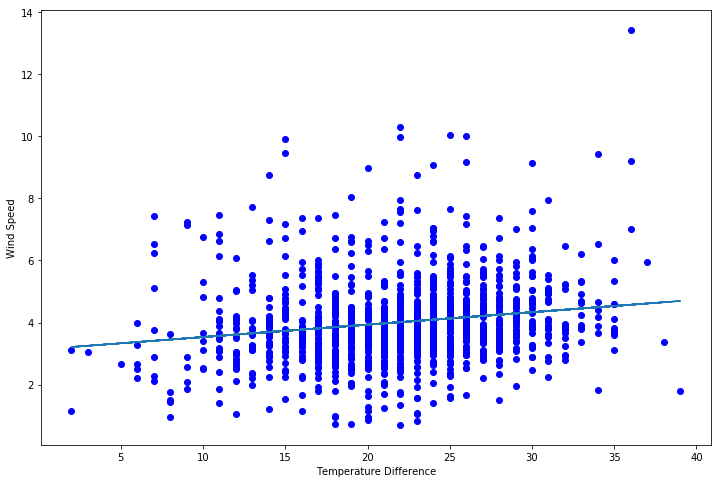

In [16]:
groupByUnit = 'PUREDATE'

x = df['dailyTempDiff'].dropna()
y = windSpeedDf.groupby(groupByUnit)['HOURLYWindSpeed'].mean().dropna()[:1239]

plt.scatter(x, y, color='b')
plt.xlabel('Temperature Difference')
plt.ylabel('Wind Speed')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-')

#### #### The figure above indicates that generally wind speed increases as the temperature difference increases.